In [1]:
import random

from laueimproc.io.download import get_samples  # gives access to the dataset
from laueimproc.classes.diagram import Diagram
import matplotlib.pyplot as plt

%matplotlib inline
# import mpld3
# mpld3.enable_notebook()
# plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (8.0, 8.0)

## Diagram manipulation
In this part, we are going to show how to manipulate a Laue Diagram object.
* A Diagram instance contains the image data, accessible throw the `image` attribute.
* A Diagram instance contains a set of `Spot` as well. It is possible to remove some spots by filtering.
* Finnaly, it gives to you somme vectorized methodes for extracting information from image processing

diagram from file /home/rrichard/.cache/laueimproc/samples/NMC_mapHR_3428.tif


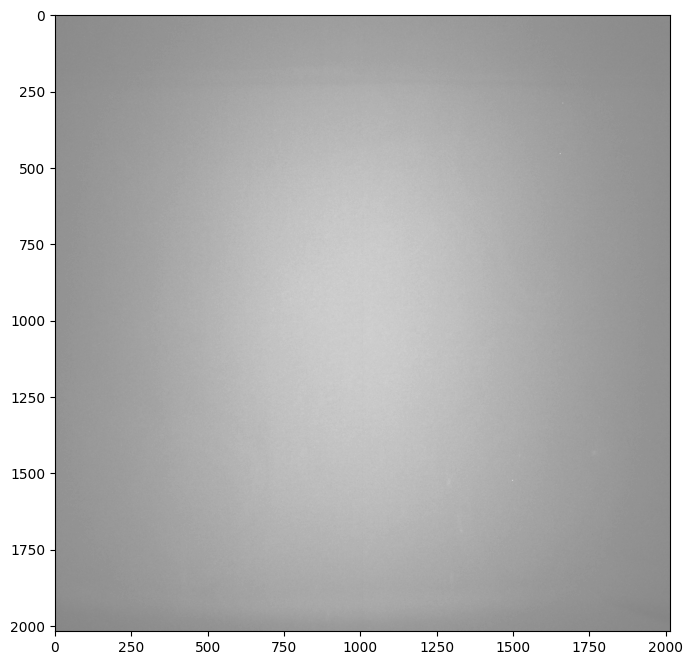

diagram from file /home/rrichard/.cache/laueimproc/samples/247_4_p2_cam45_1304.mccd


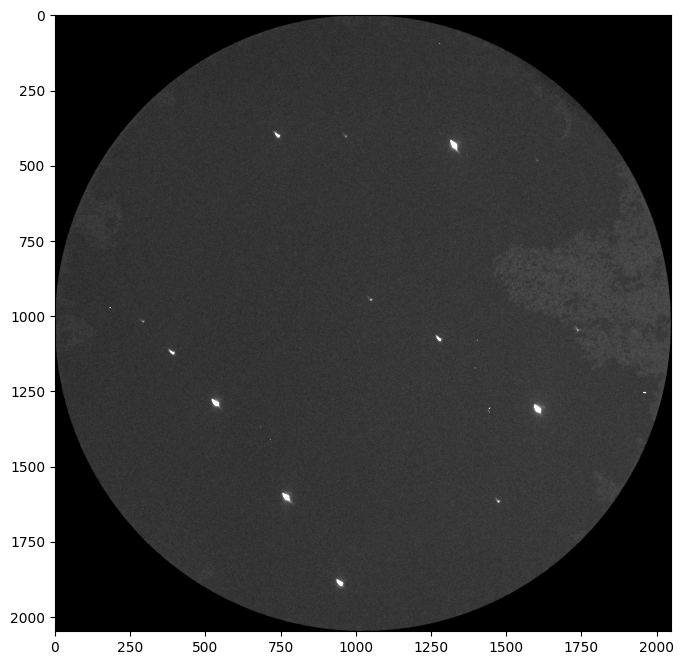

diagram from file /home/rrichard/.cache/laueimproc/samples/steelB4charged_0582.tif


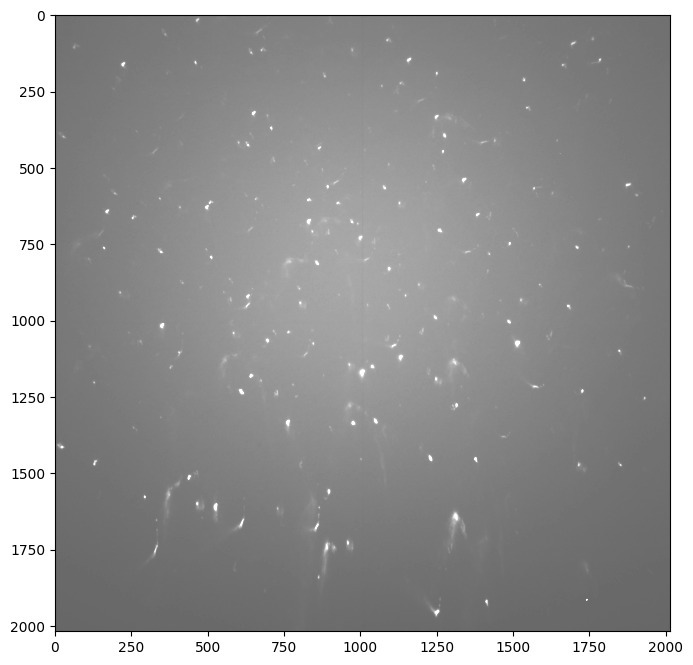

diagram from file /home/rrichard/.cache/laueimproc/samples/Zr2_0000.mccd


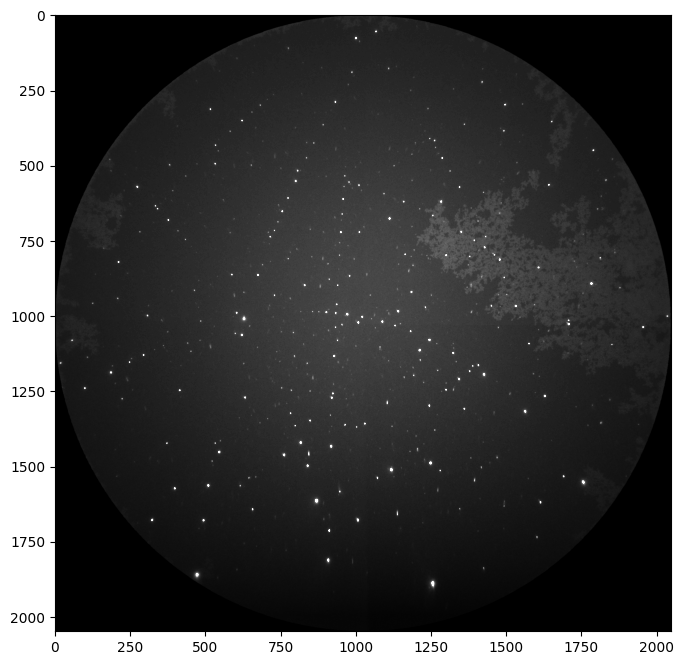

diagram from file /home/rrichard/.cache/laueimproc/samples/247_1_0100.mccd


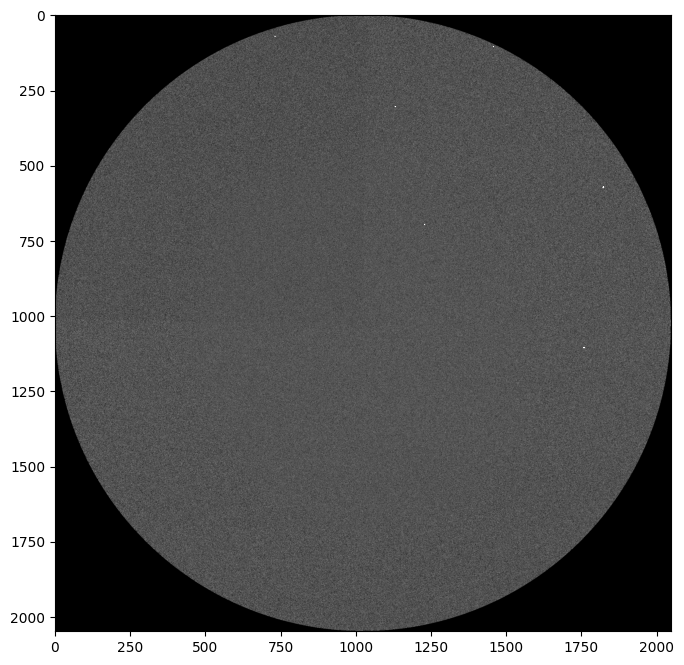

diagram from file /home/rrichard/.cache/laueimproc/samples/steelB4charged_0628.tif


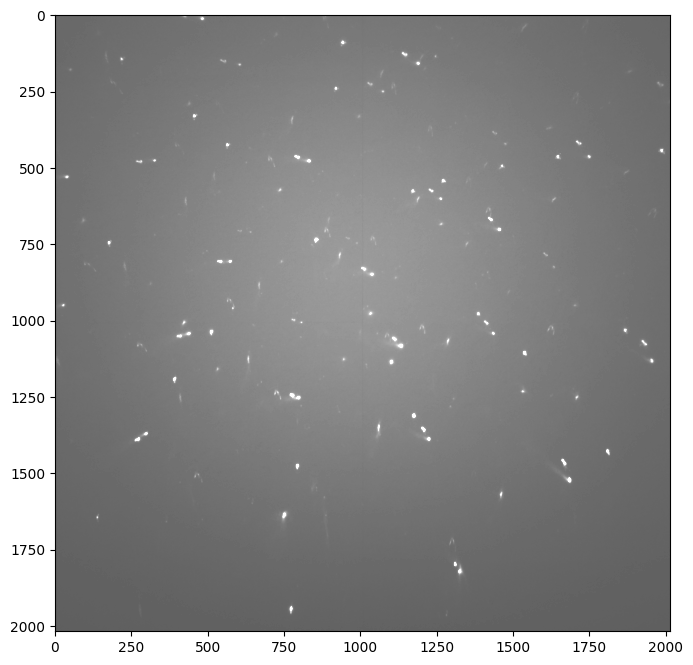

diagram from file /home/rrichard/.cache/laueimproc/samples/Zr_0281.mccd


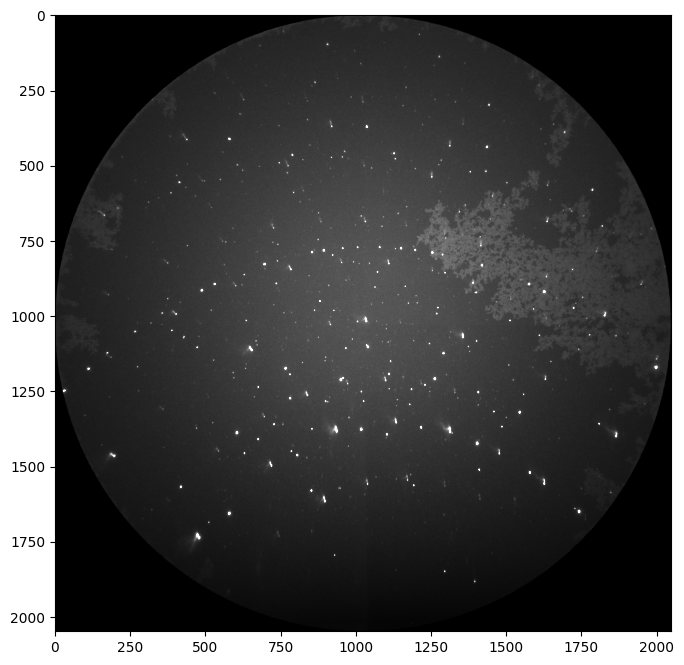

diagram from file /home/rrichard/.cache/laueimproc/samples/s2_0624.tif


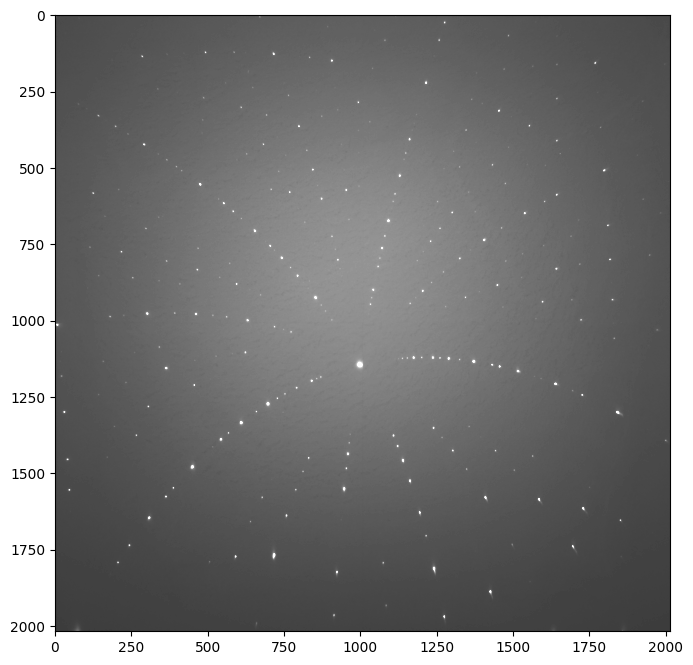

diagram from file /home/rrichard/.cache/laueimproc/samples/test_38_mar.tif


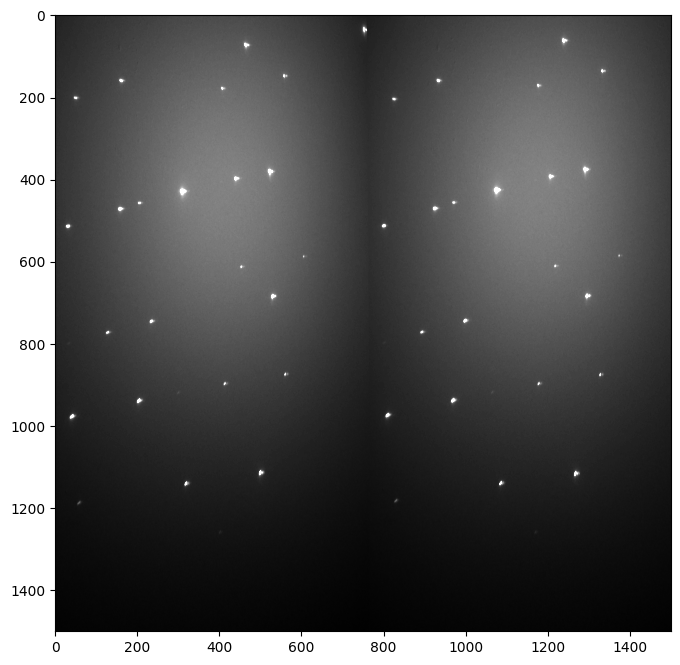

diagram from file /home/rrichard/.cache/laueimproc/samples/247_1_p3_cam45_1016.mccd


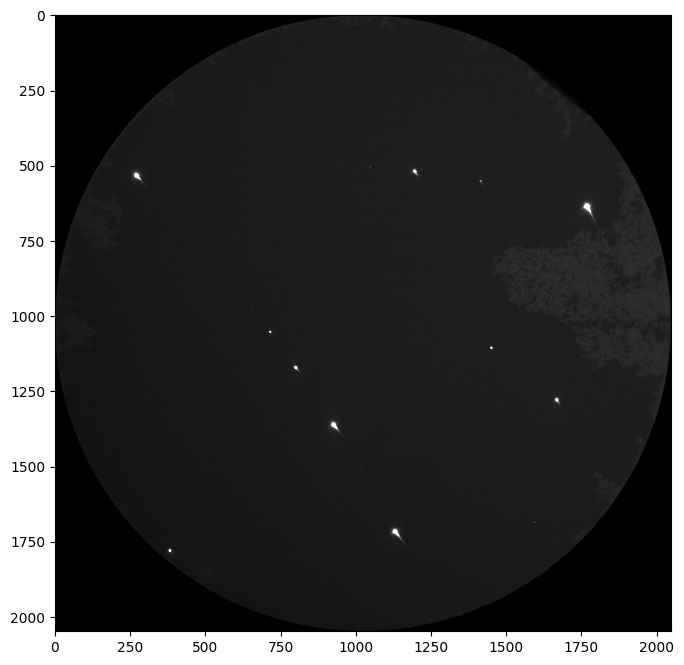

In [3]:
files = random.choices(list(get_samples().iterdir()), k=10)  # pick out 10 random Laue filenames
diagrams = [Diagram(f) for f in files]  # instanciate a diagram, it is also possible to give the array directly
for diagram in diagrams:
    print(f"diagram from file {diagram.file}")
    plt.imshow(diagram.image, cmap="gray", vmax=diagram.image.mean() + 5.0*diagram.image.std())
    plt.show()

In [4]:
for diagram in diagrams:
    diagram.peaks_search(threshold=4.0)  # optional (it is called automaticaly with default params), reset all spots
    print(f"{len(diagram.spots)} spots are founded in {diagram.file.name}")

11179 spots are founded in NMC_mapHR_3428.tif
22 spots are founded in 247_4_p2_cam45_1304.mccd
149 spots are founded in steelB4charged_0582.tif
256 spots are founded in Zr2_0000.mccd
4954 spots are founded in 247_1_0100.mccd
99 spots are founded in steelB4charged_0628.tif
299 spots are founded in Zr_0281.mccd
221 spots are founded in s2_0624.tif
47 spots are founded in test_38_mar.tif
12 spots are founded in 247_1_p3_cam45_1016.mccd


## Filter the spots
It is possible to selects the spot depending the properties we want.
* As a diagram contains a `image` attribute, a Spot instance contains a `roi` attribute. It corresponds to a patch of the diagram image without background.
* All the properties giving spot information defined in a diagram, are automaticaly accessible in a `Spot` instance.

diagram from file /home/rrichard/.cache/laueimproc/samples/NMC_mapHR_3428.tif


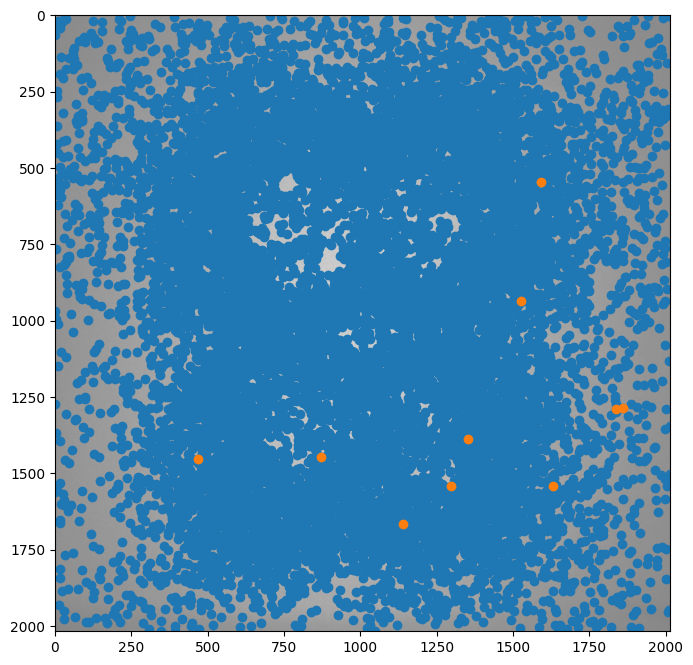

diagram from file /home/rrichard/.cache/laueimproc/samples/247_4_p2_cam45_1304.mccd


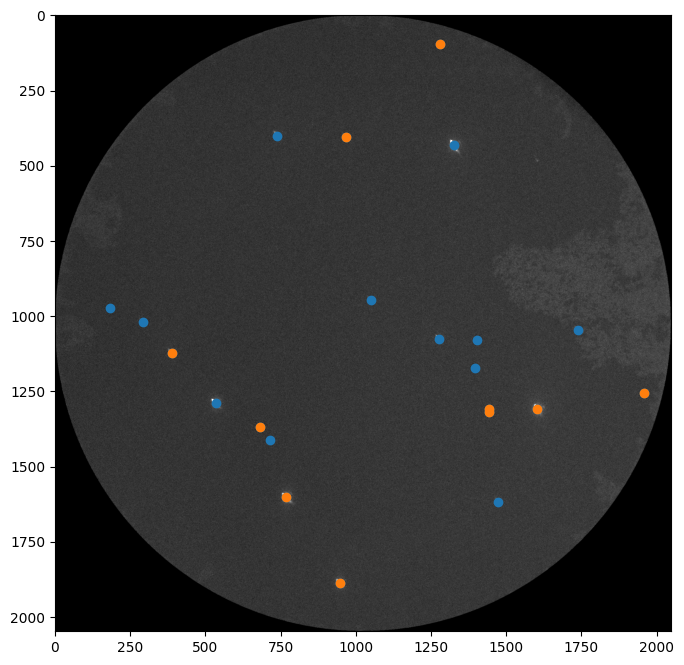

diagram from file /home/rrichard/.cache/laueimproc/samples/steelB4charged_0582.tif


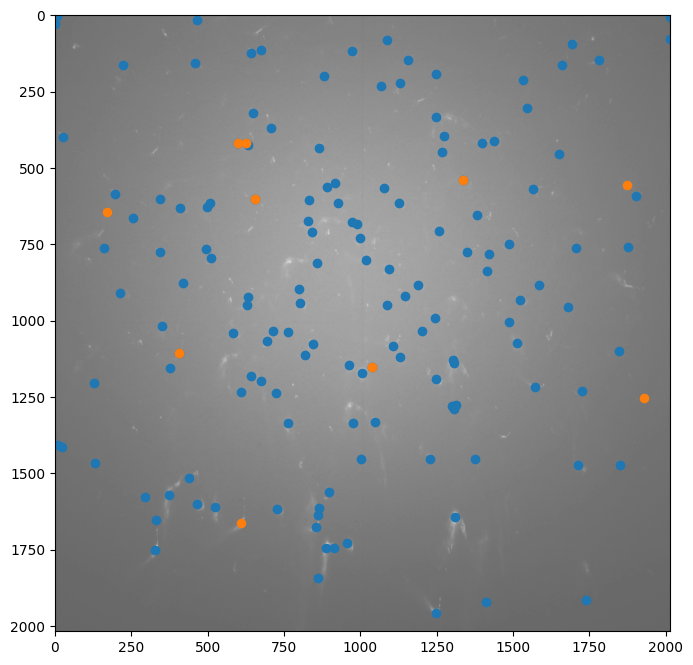

diagram from file /home/rrichard/.cache/laueimproc/samples/Zr2_0000.mccd


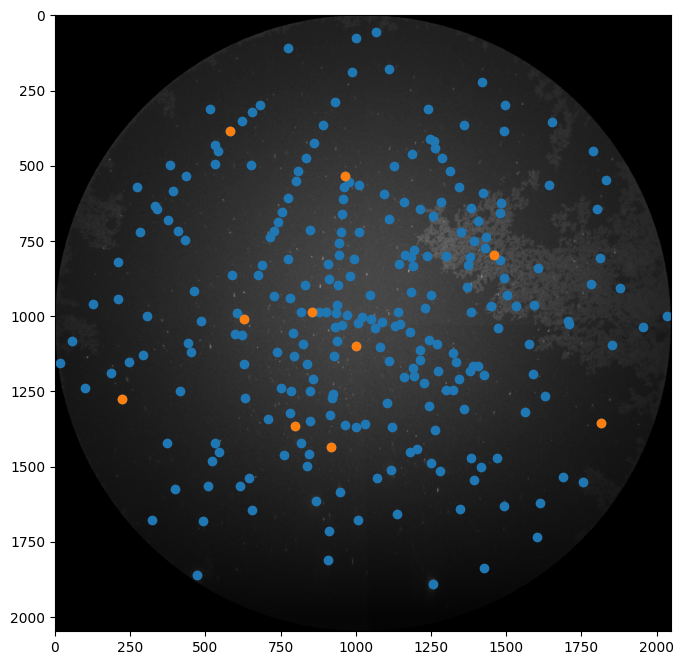

diagram from file /home/rrichard/.cache/laueimproc/samples/247_1_0100.mccd


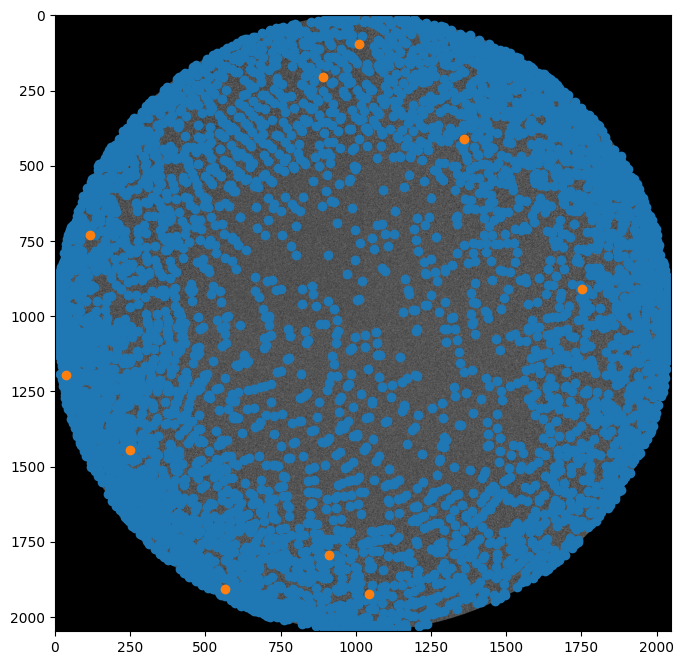

diagram from file /home/rrichard/.cache/laueimproc/samples/steelB4charged_0628.tif


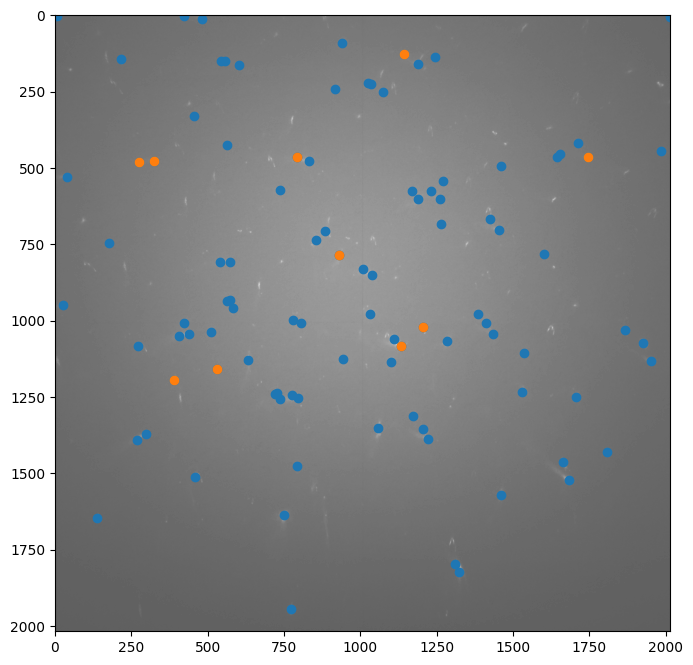

diagram from file /home/rrichard/.cache/laueimproc/samples/Zr_0281.mccd


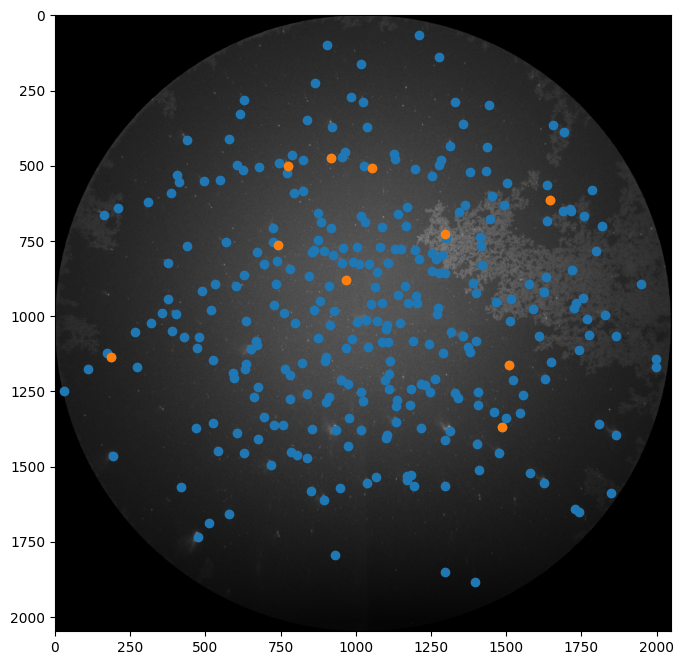

diagram from file /home/rrichard/.cache/laueimproc/samples/s2_0624.tif


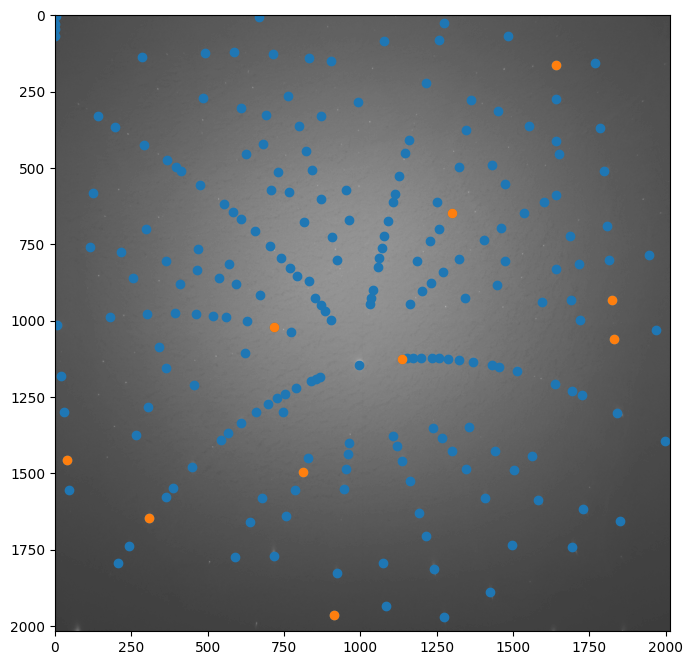

diagram from file /home/rrichard/.cache/laueimproc/samples/test_38_mar.tif


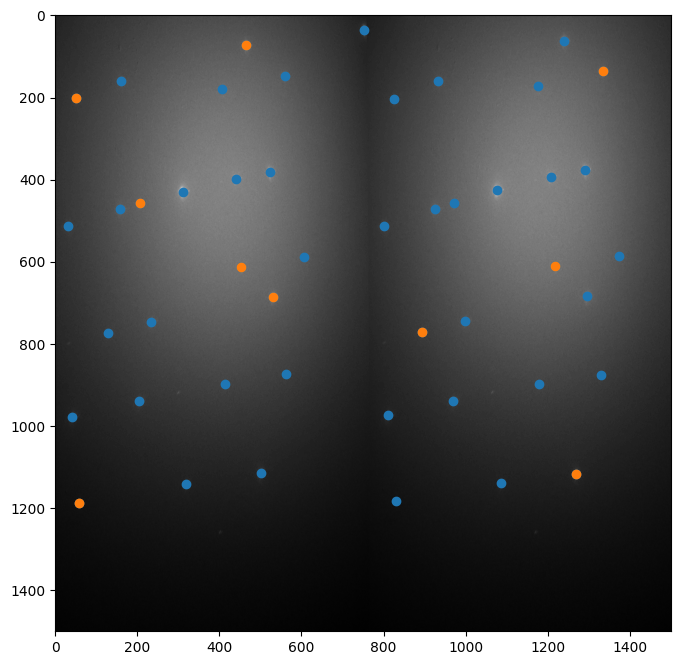

diagram from file /home/rrichard/.cache/laueimproc/samples/247_1_p3_cam45_1016.mccd


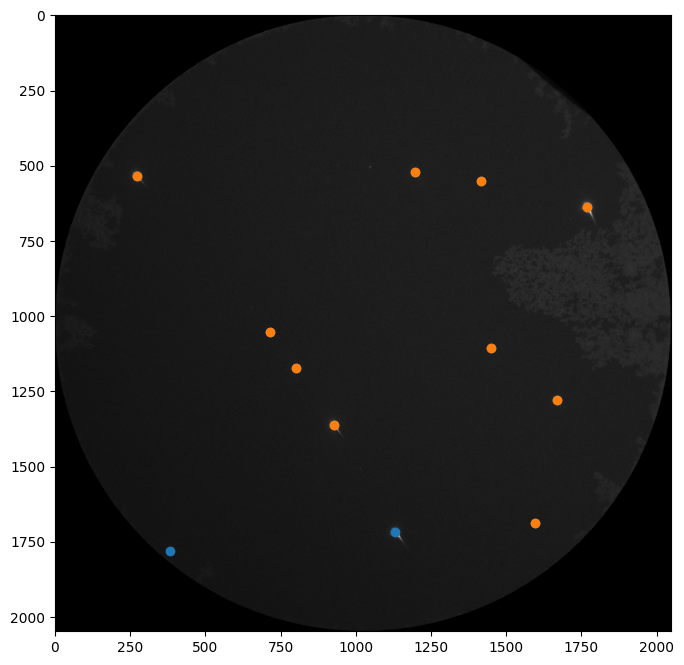

In [5]:
def select_spots(spots: set):
    """Select the 10 more intensive spots."""
    sorted_spots = sorted(
        spots, key=lambda spot: spot.pxl_intensity, reverse=True
    )
    return sorted_spots[:10]

def plot_spots(diagram):
    """Append the spots to the figure."""
    barycenters = diagram.get_barycenters()  # like all the methods of spot filtering, it return a dictionary with the spots as key
    values = list(diagram.get_barycenters().values())
    plt.scatter([b[1] for b in values], [b[0] for b in values])
    
for diagram in diagrams:
    print(f"diagram from file {diagram.file}")
    plt.imshow(diagram.image, cmap="gray", vmax=diagram.image.mean() + 5.0*diagram.image.std())
    plot_spots(diagram)
    diagram.spots = select_spots(diagram.spots)  # it is possible to set a new set container (reset is peak search)
    plot_spots(diagram)
    plt.show()

In [ ]:
diagram.image
list(diagram.get_barycenters().values())

In [ ]:
diagram.filter("nom_nouvel_attribut", ...)
diagram.nom_nouvel_attribut

In [ ]:
spot

In [ ]:
spot.barycenter